In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

### BCMABRP

In [2]:
with open('results/jester_long_results/results_jester_bcmabrp_t_100000_n_5_d_15.pickle', "rb") as f:
    bcmabrp15 = pickle.load(f)

In [3]:
with open('results/jester_long_results/results_jester_bcmabrp_t_100000_n_5_d_30.pickle', "rb") as f:
    bcmabrp30 = pickle.load(f)

In [4]:
with open('results/jester_long_results/results_jester_bcmabrp_t_100000_n_5_d_60.pickle', "rb") as f:
    bcmabrp60 = pickle.load(f)

In [5]:
bcmabrp_dict = {
    'BCMABRP (d=15)': np.mean(np.stack(bcmabrp15[1]['BCMABRP (nu=0.27)']), axis=0),
    'BCMABRP (d=30)': np.mean(np.stack(bcmabrp30[1]['BCMABRP (nu=0.27)']), axis=0),
    'BCMABRP (d=60)': np.mean(np.stack(bcmabrp60[1]['BCMABRP (nu=0.27)']), axis=0)
}

### CBRAP

In [6]:
with open('results/jester_long_results/results_jester_cbrap_t_100000_n_5_d_15.pickle', "rb") as f:
    cbrap15 = pickle.load(f)

In [7]:
with open('results/jester_long_results/results_jester_cbrap_t_100000_n_5_d_30.pickle', "rb") as f:
    cbrap30 = pickle.load(f)

In [8]:
with open('results/jester_long_results/results_jester_cbrap_t_100000_n_5_d_60.pickle', "rb") as f:
    cbrap60 = pickle.load(f)

In [9]:
cbrap_dict = {
    'CBRAP (d=15)': np.mean(np.stack(cbrap15[1]['CBRAP (alpha=0.43)']), axis=0),
    'CBRAP (d=30)': np.mean(np.stack(cbrap30[1]['CBRAP (alpha=0.43)']), axis=0),
    'CBRAP (d=60)': np.mean(np.stack(cbrap60[1]['CBRAP (alpha=0.43)']), axis=0)
}

### LinearTS

In [10]:
with open('results/jester_long_results/results_jester_linearts_t_100000_n_5_d_15.pickle', "rb") as f:
    linearts = pickle.load(f)

In [11]:
linearts_dict = {'LinearTS (nu=0.3)': np.mean(np.stack(linearts[1]['LinearTS (nu=0.3)']), axis=0)}

### LinUCB

In [12]:
with open('results/jester_long_results/results_jester_linucb_t_100000_n_5_d_15.pickle', "rb") as f:
    linucb = pickle.load(f)

In [13]:
linucb_dict = {'LinUCB': np.mean(np.stack(linucb[1]['LinUCB (alpha=0.6)']), axis=0)}

### UCB1

In [14]:
with open('results/jester_long_results/results_jester_ucb_t_100000_n_5_d_15.pickle', "rb") as f:
    ucb = pickle.load(f)

In [15]:
ucb_dict = {'UCB': np.mean(np.stack(ucb[1]['UCB (alpha=0.2)']), axis=0)}

### Epsilon-greedy

In [16]:
with open('results/jester_long_results/results_jester_egreedy_t_100000_n_5_d_15.pickle', "rb") as f:
    egreedy = pickle.load(f)

In [17]:
egreedy_dict = {'E-Greedy': np.mean(np.stack(egreedy[1]['E-Greedy (epsilon=0.4)']), axis=0)}

### Random policy

In [18]:
with open('results/jester_long_results/results_jester_random_t_100000_n_5_d_15.pickle', "rb") as f:
    random = pickle.load(f)

In [19]:
random_dict = {'RandomPolicy': np.mean(np.stack(random[1]['RandomPolicy']), axis=0)}

In [20]:
# TODO plot ctr
# TODO add markers to plots

In [21]:
def plot_ctrs(reward_dict):
    fig, ax = plt.subplots(1,1, figsize=(15, 7));
    
    N = 40
    
    for label, reward in reward_dict.items():
        times = (range(1, len(reward)+1))
        ctr = [r/t for r,t in zip(reward, times)]
        ax.plot(ctr[N:], label=label)
        
    ax.set_xlabel('Trial')
    ax.set_ylabel('CTR')
    ax.set_title('CTR on Jester 100,000')

    plt.legend();
    plt.savefig('jester_results_ctr', dpi=300, facecolor=fig.get_facecolor());
    plt.show();

In [22]:
def plot_rewards(reward_dict):
    fig, ax = plt.subplots(1,1, figsize=(15, 7));
    
    
    for label, reward in reward_dict.items():
        
        ax.plot(reward, label=label)
    ax.set_xlabel('Trial')
    ax.set_ylabel('Cumulative reward')
    ax.set_title('Cumulative reward on Jester 100,000')

    plt.legend();
    plt.savefig('jester_results_reward', dpi=300, facecolor=fig.get_facecolor());
    plt.show();

In [23]:
reward_dict = {}

In [24]:
for policy_dict in [bcmabrp_dict, cbrap_dict, linearts_dict, linucb_dict, ucb_dict, egreedy_dict, random_dict]:
    reward_dict.update(policy_dict)

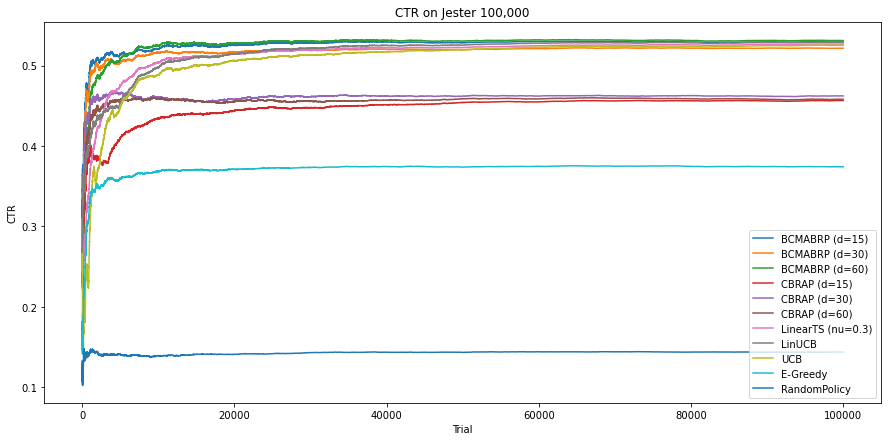

In [25]:
plot_ctrs(reward_dict);

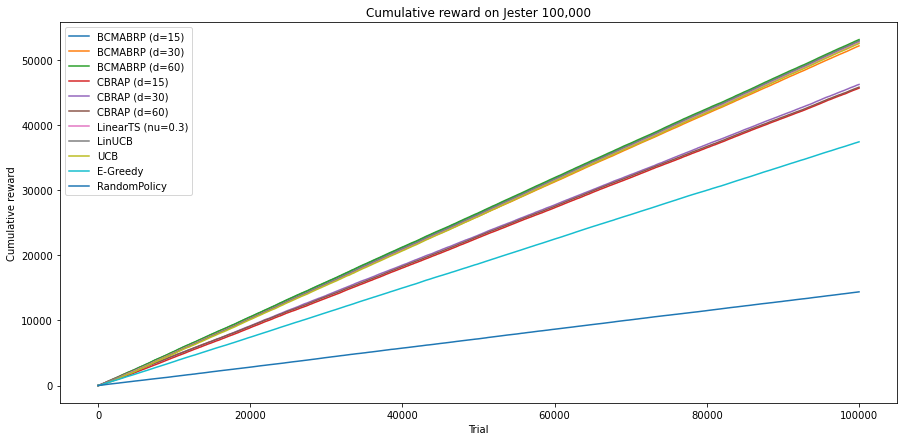

In [26]:
plot_rewards(reward_dict);

_____

| Dataset |     Policy     | Dimension | Time consumption (seconds) | Cumulative reward |   |
|:-------:|:--------------:|:---------:|:--------------------------:|:-----------------:|:-:|
|         |    LinearTS    |    300    |           5384.6           |      52668.4      |   |
|         |    BCMAB-RP    |     15    |            331.3           |      52929.4      |   |
|         |    BCMAB-RP    |     30    |            796.1           |      52147.8      |   |
|  Jester |    BCMAB-RP    |     60    |            972.8           |      53111.4      |   |
|         |     LinUCB     |    300    |           2051.7           |      52883.0      |   |
|         |      CBRAP     |     15    |            388.2           |      45651.0      |   |
|         |      CBRAP     |     30    |            881.0           |      46222.0      |   |
|         |      CBRAP     |     60    |            964.9           |      45806.0      |   |
|         |      UCB1      |     -     |            268.6           |      52511.0      |   |
|         | Epsilon-greedy |     -     |            218.3           |      47381.8      |   |
|         |  Random policy |     -     |            223.9           |      14379.8      |   |